In [1]:
import nest
import network
import addons
import numpy as np
from network_params import net_dict
import network_params
from sim_params import sim_dict
from stimulus_params import stim_dict


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.


Initialize the network with simulation, network and stimulation parameters, then create and connect all nodes, and finally simulate. The times for a presimulation and the main simulation are taken independently. A presimulation is useful because the spike activity typically exhibits a startup transient. In benchmark simulations, this transient should be excluded from a time measurement of the state propagation phase. Besides, statistical measures of the spike activity should only be computed after the transient has passed.

Data will be written to: data_gamma_stimulation/
  Directory already existed. Old data will be overwritten.


RNG seed: 55
Total number of virtual processes: 10
Creating neuronal populations.

Feb 28 13:59:14 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.1 ms.
Creating recording devices.
  Creating spike recorders.
Creating Poisson generators for background input.
Creating thalamic input for external stimulation.
Connecting neuronal populations recurrently.
NodeCollection(metadata=None, model=iaf_psc_exp, size=20683, first=1, last=20683)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5834, first=20684, last=26517)
NodeCollection(metadata=None, model=iaf_psc_exp, size=21915, first=26518, last=48432)
NodeCollection(metadata=None, model=iaf_psc_exp, size=5479, first=48433, last=53911)
NodeCollection(metadata=None, model=iaf_psc_exp, size=4850, first=53912, last=58761)
NodeCollection(metadata=None, model=iaf_psc_exp, size=1065, first=58762, las

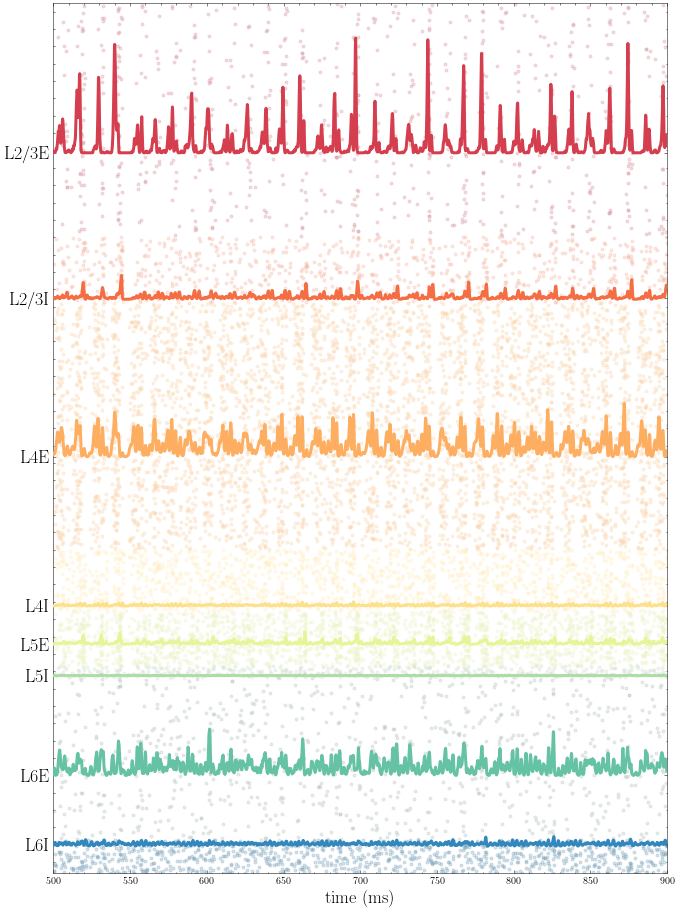

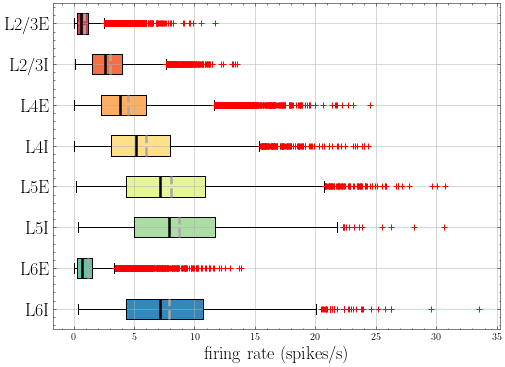

In [2]:
record_synapses = True



bg_rate = np.linspace(4,12,int((12-4)/0.25))
ref_period = np.linspace(0,10,int(10/0.25))
exc_delay = np.linspace(0.5,5,int(5/0.25))
inh_delay = np.linspace(0.25,4,(int(4/0.25)))
ex_in_balance = np.linspace(3,4,int((4-3)/0.25))

step_stim = np.linspace(1,10,int((10-1)/0.25))

net = network.Network(sim_dict, net_dict, stim_dict, path = "data_gamma_stimulation/")
net.create()
net.connect()
    
if record_synapses:
    data_synapses = addons.number_synapses(net.pops)
record_synapses = False
    

net.simulate(sim_dict["t_presim"])
net.simulate(sim_dict["t_sim"])
raster_plot_interval = np.array([500, 900])
firing_rates_interval = np.array([500,60500])
pop_activity = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True)

#for i in range(len(step_stim)):
     
    #net = network.Network(sim_dict, net_dict, stim_dict, path = "data_step_stimulation/" + str(round(step_stim[i],2)) + "/",th_rate=step_stim[i])
    #net = network.Network(sim_dict, net_dict, stim_dict, path = "data_background_rate/" + str(round(bg_rate[16],2)) + "/", bg_rate= bg_rate[16])
    #net = network.Network(sim_dict, net_dict, stim_dict, "data_refractory_period/" + str(round(ref_period[i],2)) + "/")
    #matrix = network_params.get_exc_inh_matrix(exc_delay[i], net_dict["delay_inh_mean"], len(net_dict["populations"]))
    #matrix = network_params.get_exc_inh_matrix(net_dict["delay_exc_mean"], inh_delay[i], len(net_dict["populations"]))
    #PSP_matrix_mean = network_params.get_exc_inh_matrix(
    #net_dict["PSP_exc_mean"], net_dict["PSP_exc_mean"] * ex_in_balance[i], len(net_dict["populations"]))
    #PSP_matrix_mean[0, 2] = 2.0 * net_dict["PSP_exc_mean"] #doubling from l4e to l23e
    #PSP_matrix_mean[3,2] = 1.15 * PSP_matrix_mean[3,2] #increasing l41ito l4e

    #net = network.Network(sim_dict, net_dict, stim_dict, "data_inhibitory_delay/" + str(round(inh_delay[i],2)) + "/",matrix=matrix)
    #net = network.Network(sim_dict, net_dict, stim_dict, "data_inhibitory_strength/" + str(round(ex_in_balance[i],2)) + "/",PSP_mean=PSP_matrix_mean)

    #net.create()
    #net.connect()
    
    #if record_synapses:
    #    data_synapses = addons.number_synapses(net.pops)
    #record_synapses = False
    

    #net.simulate(sim_dict["t_presim"])
    #net.simulate(sim_dict["t_sim"])
    #raster_plot_interval = np.array([500, 900])
    #firing_rates_interval = np.array([500,60500])
    #pop_activity = net.evaluate(raster_plot_interval, firing_rates_interval,binned=True)